In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imprimirHisto(hist, min, max):
  plt.bar(list(range(min, max)), hist[min:max], align='center', width=0.9)
  plt.xlabel('Numero de cartas')
  plt.xticks(list(range(min, max)))
  plt.title('distribucion experimental: obtener 21')
  plt.show()

In [3]:
def calcularProbabilidad(cartas, n, sumaInicial=0):
 cont = 0
 DistribucionDeCartas = [0]*11
 minDistribucion = 11
 maxDistribucion = 1
 for i in range(n):
    copiaCarta = cartas.copy()
    sum = sumaInicial
    cantidadCartas = 0
    while sum < 21:
      choice = r.choice(copiaCarta)
      copiaCarta.remove(choice)
      sum += choice
      cantidadCartas += 1
    if sum == 21:
        minDistribucion = cantidadCartas if cantidadCartas < minDistribucion else minDistribucion
        maxDistribucion = cantidadCartas if cantidadCartas >   maxDistribucion else   maxDistribucion
        DistribucionDeCartas[cantidadCartas] += 1
        cont += 1

 imprimirHisto( DistribucionDeCartas, minDistribucion,   maxDistribucion)
 return cont/n



In [4]:
def compute_half_deck(cartas):
  cartas=cartas*4
  l = len(cartas)
  cartas.remove(7)
  cartas.remove(7)
  cartas.remove(5)
  opciones = []
  for c in range(0, int(l/2) - 3):
    opcion = r.choice(cartas)
    opciones.append(opcion)
    cartas.remove(opcion)
  return cartas;

# 1. 1. Calcule la probabilidad de obtener 21.  baraja española con valores de cartas.
1. (a): Cards=[1,2,3,4,5,6,7,10,11,12]

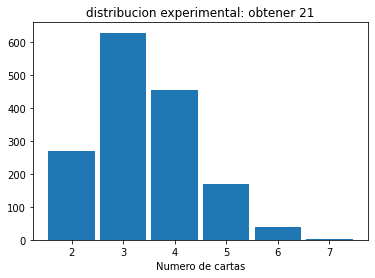

Probabilidad con baraja española:  0.1567


In [ ]:
print("Probabilidad con baraja española: ", calcularProbabilidad (list(range(1,13))*4, n=10000))

1. (b): Cards=[1,2,3,4,5,6,7,10,11,12,13]


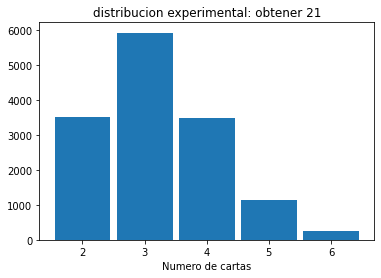

probabilidad con baraja de poker:  0.1436


In [ ]:
print("probabilidad con baraja de poker: ",calcularProbabilidad(list(range(1,14))*4,n=100000))

# 2. Calcule la probabilidad de obtener 21.  baraja española con valores de cartas.


2 (a) Deck=[1,2,3,4,5,6,7,8,9,10,10,10]



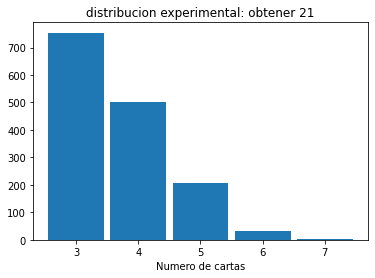

Probablity:  0.1497


In [ ]:
print("probabilidad: ",calcularProbabilidad ([1,2,3,4,5,6,7,8,9,10,10,10]*4,n=10000))

2 (b) Deck=[1,2,3,4,5,6,7,8,9,10,10,10,10]

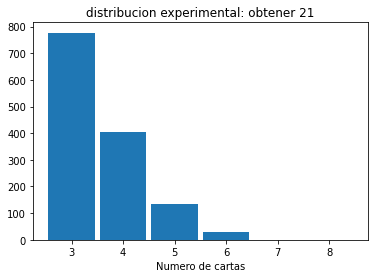

probabilidad:  0.1347


In [ ]:
print("probabilidad: ",calcularProbabilidad ([1,2,3,4,5,6,7,8,9,10,10,10,10]*4,n=10000))

# 3. Encuentra mazos restantes para mazos de cartas de español y poker
3 (a) Cartas=[1,2,3,4,5,6,7,10,11,12]

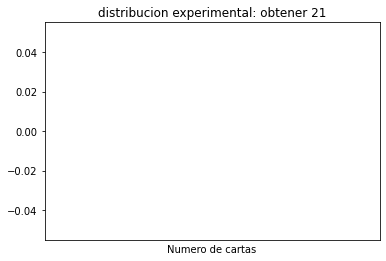

probabilidad:  0.0855


In [ ]:
cartas=[1,2,3,4,5,6,7,8,9,10,11,12]
cartas=compute_half_deck(cartas)
print("probabilidad: ", calcularProbabilidad (cartas, n=10000, sumaInicial=19))

3 (b) Cards=[1,2,3,4,5,6,7,10,11,12,13]

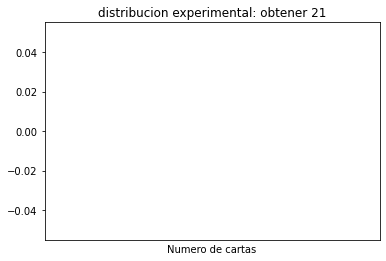

Probabilidad:  0.088


In [ ]:
cards=compute_half_deck([1,2,3,4,5,6,7,8,9,10,11,12,13])
print("Probabilidad: ", calcularProbabilidad (cartas, n=10000, sumaInicial=19))

# 4. Encuentra mazos restantes para mazos de cartas de español y poker

In [25]:
hot_deck = [2,1]*4
cold_deck = [10,11, 12]*4

In [49]:
def calc(cartas, n, sumaInicial=0):
 cont = 0
 DistribucionDeCartas = [0]*11
 minDistribucion = 0
 maxDistribucion = 11
 for i in range(n):
    copiaCarta = cartas.copy()
    sum = sumaInicial
    cantidadCartas = 3
    while sum < 21:
      choice = r.choice(copiaCarta)
      copiaCarta.remove(choice)
      sum += choice
      cantidadCartas += 1
    if sum == 21:
        DistribucionDeCartas[cantidadCartas] += 1
        cont += 1

 imprimirHisto( DistribucionDeCartas, minDistribucion,   maxDistribucion)
 return cont/n

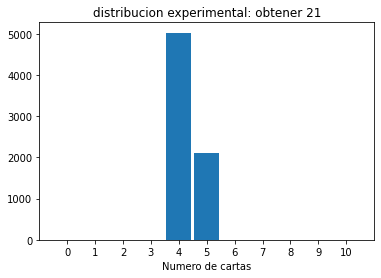

Probablida con mazo caliente:  0.7126


In [51]:
print("Probablida con mazo caliente: ", calc(hot_deck, n=10000, sumaInicial=19))

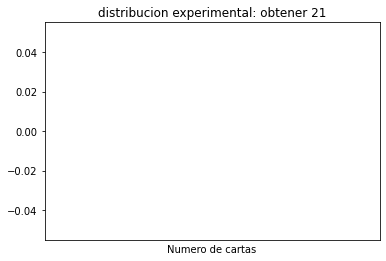

Probablida con mazo frio:  0.0


In [52]:
print("Probablida con mazo frio: ", calcularProbabilidad(cold_deck, n=10000, sumaInicial= 19))

In [53]:
hot_deck = [1,2,3]*4
cold_deck = [11,12,13]*4

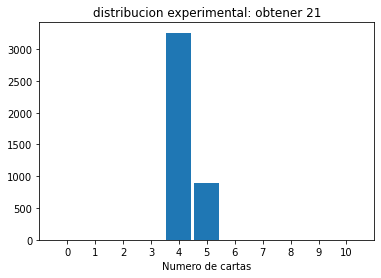

Probablida con mazo caliente:  0.4154


In [54]:
print("Probablida con mazo caliente: ", calc (hot_deck, n=10000, sumaInicial= 19))

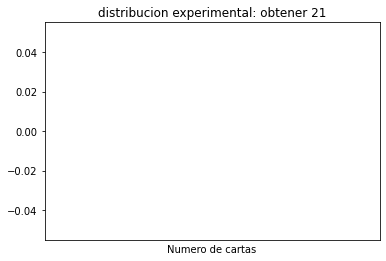

Probablida con mazo frio:  0.0


In [55]:
 print("Probablida con mazo frio: ", calcularProbabilidad(cold_deck, n=10000, sumaInicial=19))

#5. Ben va a Las Vegas
¿Cuál es la cantidad estimada de dinero que Ben gana o pierde en un fin de semana estimado con 10 millones de simulaciones usando los mazos de cartas españolas y de poker?



Analisis

Son 30 horas de juego todos los fines de semana. 3 * 10 = 30 horas
Equivale a 1800 minutos. 30 * 60 = 1800 minutos
Equivale a 600 juegos cada fin de semana (los tres días). 1800 minutos / 3 minutos por juego = 600 juegos

In [ ]:
def bet_play(cards, games, initial_sum, prob_deck=None):
  #Cards data
  count = 0
  cards_distribution = []
  min_distribution = 11
  max_distribution = 1
  average_cards = [] 

  #Money data
  money_bet = 1000
  money_earned = 0

  for j in range(n): #Simulating 10 million times
    cards_distribution = [] #Every weekend, the cards distribution is resetted
    count = 0 #How many times you get 21 in a weekend
    for i in range(games): #This loop represents 600 games, which is 1 weekend of gambling
      if prob_deck == 's':
        cards = get_deck_for_spanish()
      elif prob_deck == 'p':
        cards = get_deck_for_poker()
      cards_copy = cards.copy()
      sum_cards = initial_sum
      cards_count = 0
      while sum_cards < 21:
        choice = r.choice(cards_copy)
        cards_copy.remove(choice)
        sum_cards += choice
        cards_count += 1
      if sum_cards == 21:
        min_distribution = cards_count if cards_count < min_distribution else min_distribution
        max_distribution = cards_count if cards_count > max_distribution else max_distribution
        cards_distribution.append(cards_count)
        count += 1
        money_earned += (money_bet * 12) #Assuming you earn three times what you bet
    if count != 0:
      average_cards.append( sum(cards_distribution) / count ) #Every weekend you get average cards. This accumulates the averages.
    else:
      average_cards.append(0)
  #print_histogram(cards_distribution, min_distribution, max_distribution)
  
  return (money_earned / n, average_cards) #Returns (average of money earned on a weekend, distribution of the average of cards to get 21)

In [ ]:
def hist(datos,xlabel,ylabel, color): 
  plt.hist(datos, bins='auto', facecolor=color)
  plt.xlabel = xlabel
  plt.ylabel = ylabel
  plt.show()

In [ ]:
def get_deck_for_spanish():
  hot = [1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5]
  cold = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] * 4
  n = r.randint(0,10)
  if n == 0:
    return hot
  return cold

In [ ]:
def get_deck_for_poker():
  hot = [1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5]
  cold = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] * 4
  n = r.randint(0,10)
  if n == 0:
    return hot
  return cold

**SPANISH deck**

In [ ]:
#Data
n = 10000
initial_sum = 0 # Having nothing
games_per_weekend = 600

In [ ]:
#Results
simulation = bet_play([], games_per_weekend, initial_sum, prob_deck='s') 
money_earned = simulation[0]
distribution = simulation[1]
print("Money Earned: %d"%(money_earned))
print("Average cards to get 21: ", sum(distribution) / len(distribution) ) #Sums all averages, divides into number of them. This is:  the average of the averages of cards to get 21

Money Earned: 1245325
Average cards to get 21:  3.996176218299922


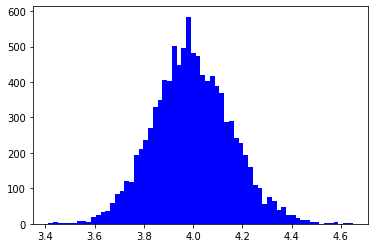

In [ ]:
#Histogram cold deck
xlabel='Número de cartas obtenidas para obtener 21'
ylabel='Cantidad de repeticiones'
color='blue'
hist(distribution, xlabel, ylabel, color)

**POKER deck**

In [ ]:
#Data
n = 10000
initial_sum = 0 # Having nothing
games_per_weekend = 600

In [ ]:
#Results
simulation = bet_play([], games_per_weekend, initial_sum, prob_deck='p') 
money_earned = simulation[0]
distribution = simulation[1]
print("Money Earned: %d"%(money_earned))
print("Average cards to get 21: ", sum(distribution) / len(distribution)) #Sums all averages, divides into number of them. This is:  the average of the averages of cards to get 21

Money Earned: 1158174
Average cards to get 21:  3.8772651390636996
